In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yashgautam321
Your Kaggle Key: ··········


100%|██████████| 36.7M/36.7M [00:02<00:00, 13.3MB/s]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/rice-leaf-diseases'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0388.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0403.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0400.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0377.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0397.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0405.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0701.jpg
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0389.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0383.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0375.JPG
/content/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0379.JPG
/content/rice-le

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization

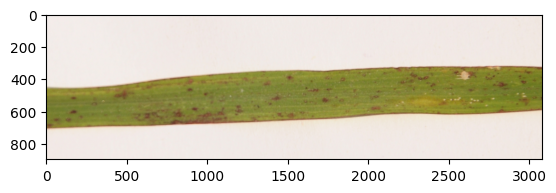

In [ ]:
imre = plt.imread("/content/rice-leaf-diseases/rice_leaf_diseases/Leaf smut/DSC_0312.JPG")
img = plt.imshow(imre)

In [ ]:
label = []
image = []
image_width = 500
image_height = 500

# First loop for label names
# secound lopp for image names
for i in os.listdir("/content/rice-leaf-diseases/rice_leaf_diseases/"):
        for j in  os.listdir("/content/rice-leaf-diseases/rice_leaf_diseases/"+i):
            img = cv2.imread("/content/rice-leaf-diseases/rice_leaf_diseases/"+i+"/"+j)
            img = cv2.resize(img,(image_width,image_height))
            label.append(i)
            image.append(img)

x = np.array(image)
y = np.array(label)

x.shape , y.shape

((120, 500, 500, 3), (120,))

In [ ]:
encode = LabelEncoder()
y = encode.fit_transform(y)

In [ ]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
data_agu = keras.Sequential([
            keras.layers.experimental.preprocessing.RandomFlip(),
            keras.layers.experimental.preprocessing.RandomRotation(0.4),
            keras.layers.experimental.preprocessing.RandomContrast(0.4)
            ])

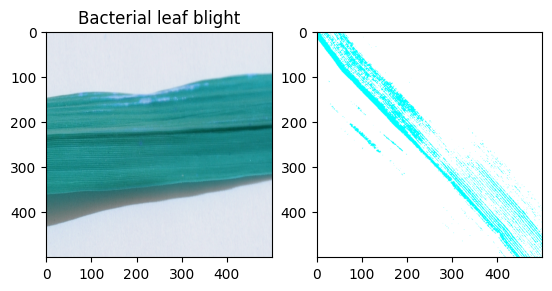

In [ ]:
plt.subplot(1,2,1)
plt.imshow(x[0])
plt.title(label[0])

# Data Agumentataion Applayed Image
plt.subplot(1,2,2)
plt.imshow(data_agu(x)[0])

In [ ]:
model = Sequential([
    data_agu,
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(3)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epoch=100
history = model.fit(x_train[:80],y_train[:80],epochs=epoch,verbose=0, validation_data=(x_train[80:],y_train[80:]))

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 784ms/step - loss: 0.8915 - accuracy: 0.6667


[0.8915328979492188, 0.6666666865348816]

In [ ]:
# Save the model in a format that can be converted to TFLite
model.save('rice_leaf_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('rice_leaf_model.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('rice_leaf_model.tflite', 'wb') as f:
    f.write(tflite_model)
